In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
plt.style.use('fivethirtyeight')
sns.palplot(sns.color_palette("Set1", n_colors=8, desat=.5))
%matplotlib inline
from scipy.stats import ttest_ind 
from scipy import stats
from collections import Counter
from collections import OrderedDict
%config IPCompleter.greedy=True



In [61]:
tracker = pd.read_csv("./Desktop/tracker2.csv")
tracker = pd.DataFrame(tracker)
tracker = tracker.rename(columns={'What is your age?': 'Age', 
                                  'What is your gender?': 'Gender',
                                  'What is your height in inches?': 'Height',
                                  'What is your weight today in pounds?': 'Start_Weight',
                                  'Is this your first Loseit Challenge?': 'Newbies',
                                  'Goal Weight': 'Goal_Weight',
                                  'What has been your highest weight in pounds? ': 'High_Weight'})
tracker = tracker.assign(Goal_Loss = tracker['Start_Weight'] - tracker['Goal_Weight'])


In [62]:
#Creating a flag of bad samples
df1= tracker.loc[tracker['Goal_Weight'] < 100]
df2= tracker.loc[tracker['Age'] < 10]
df3= tracker.loc[tracker['Age'] > 100]
df4 = tracker.loc[tracker['Goal_Loss'] > 100]
df5 = tracker.loc[tracker['Goal_Loss'] < 0]
df6 = tracker.assign(Suddenloss = tracker['Start_Weight'] - tracker['Week 1'])
df6 = tracker.loc[df6['Suddenloss'] > 100]
df7 = tracker.assign(Suddenloss = tracker['Week 1'] - tracker['Week 2'])
df7 = tracker.loc[df7['Suddenloss'] > 100]
Outlierdf=df1.append([df2, df3, df4, df5, df6, df7])
print(len(Outlierdf))
Outlierdf.drop_duplicates(keep='first', inplace = True)
print(len(Outlierdf))
print(len(tracker))
tracker= pd.concat([tracker, Outlierdf]).drop_duplicates(keep=False)
print(len(tracker))
#Outlierdf.to_csv('TrackerFlagged.csv')

38
36
3314
3278


In [9]:
#tracker.drop(tracker.loc[tracker['Goal_Weight'] < 100].index, inplace=True)
#tracker.drop(tracker.loc[tracker['Age'] > 100  ].index, inplace=True)
#tracker.drop(tracker.loc[tracker['Age'] < 10  ].index, inplace=True)

#Gender

<function print>

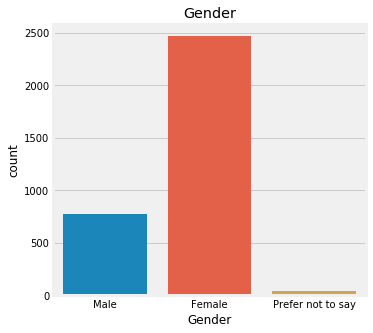

In [63]:
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='Gender', data= tracker)
ax.set_title('Gender')
print

#AGE

C:\Users\ouwen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


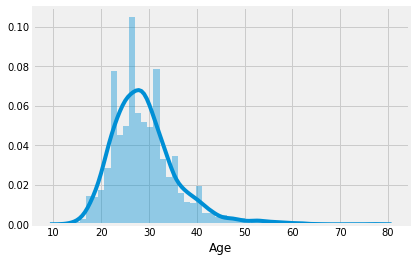

In [64]:
sns.distplot(tracker.Age)

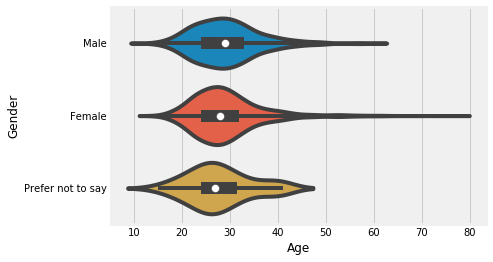

In [65]:
sns.violinplot(x='Age', y="Gender", data=tracker)
#xaxis.grid(True)
#set(ylabel="")
#set_xlim([0, 80])
# ax2.yaxis.set_label_position("right")
#yaxis.tick_right()

# ax2.set_title('Age Distribution in r/loseit Challenges')
#f.suptitle('Age Distribution in r/loseit Challenges')

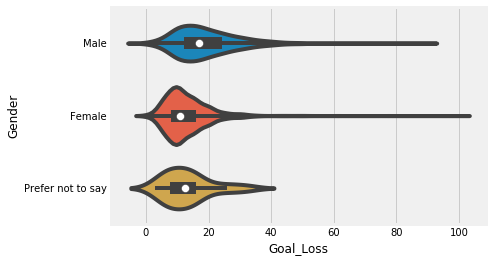

In [66]:
sns.violinplot(x='Goal_Loss', y="Gender", data=tracker)

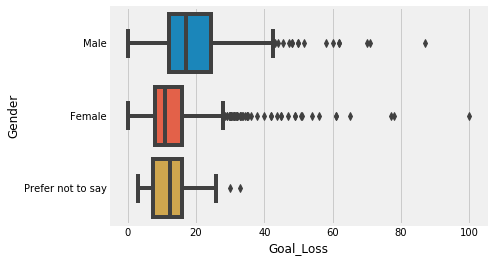

In [67]:
sns.boxplot(x='Goal_Loss', y="Gender", data=tracker, width=.8)

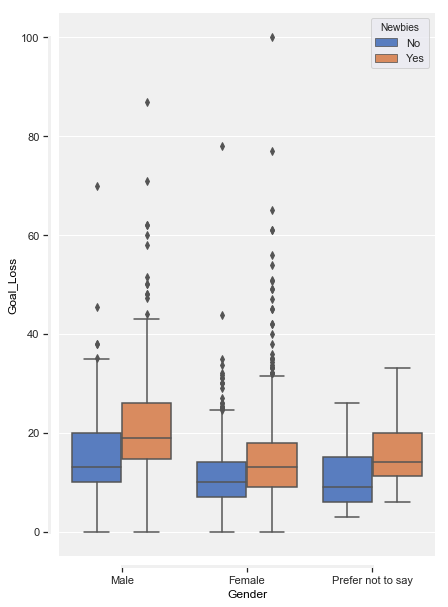

In [69]:
f, ax = plt.subplots(figsize=(6, 10))
sns.set(palette="muted")
sns.boxplot(x="Gender", y="Goal_Loss",
            hue="Newbies",
            data= tracker)
sns.despine(offset=10, trim=True)

#lines = ax.get_lines()
#categories = 

#for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
#    y = round(lines[4+cat*6].get_ydata()[0],1) 
 #   print(y)
  #  print(cat)
   # print(f'{y}')
   # print(categories)
   # ax.text(
   #     cat, 
    #    y, 
     #   f'{y}', 
      #  ha='center', 
     #   va='center', 
      #  fontweight='bold', 
       ## size=10,
       # color='white',
       # bbox=dict(facecolor='#445A64'))

            

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Goal_Loss ~ Gender',
                data=tracker).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq      df           F        PR(>F)
Gender     18540.828630     2.0  133.921119  3.899125e-56
Residual  183648.474359  2653.0         NaN           NaN


In [72]:
print(
    f'most common: {Counter(tracker["Age"]).most_common(1)}, average: {tracker["Age"].mean():.1f}, youngest: {tracker["Age"].min()}, oldest: {tracker["Age"].max()}')

most common: [(28.0, 237)], average: 29.1, youngest: 13.0, oldest: 77.0


#newbies

Text(0.5, 1.0, 'New to the Challenge?')

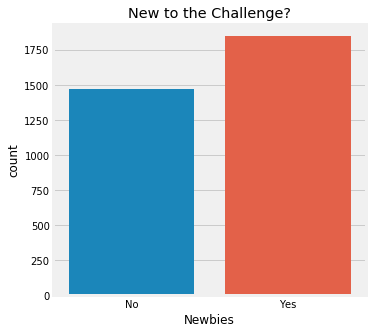

In [182]:
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='Newbies', data= tracker)
ax.set_title('New to the Challenge?')

C:\Users\ouwen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


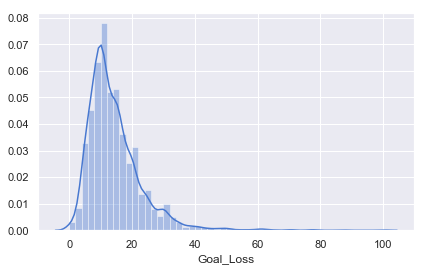

In [73]:

tracker = tracker.assign(Goal_Loss = tracker['Start_Weight'] - tracker['Goal_Weight'])
tracker.drop(tracker.loc[tracker['Goal_Loss'] < 0].index, inplace=True)

tracker.head()
sns.distplot(tracker.Goal_Loss.dropna())

#dfgoal_loss=tracker.Start_Weight - tracker.GoalWeight

In [221]:
print(
    f'most common: {Counter(tracker["Goal_Loss"]).most_common(1)}, average: {tracker["Goal_Loss"].mean():.1f}, least: {tracker["Goal_Loss"].min()}, greatest: {tracker["Goal_Loss"].max()}')

most common: [(10.0, 203)], average: 14.5, least: -92.0, greatest: 120.0


In [362]:
def NumDropout (Week)
    dropout = tracker.Goal_Weight.dropna()
print(len(dropout))


2682


In [393]:
tracker = pd.read_csv("./Desktop/tracker2.csv")
tracker = pd.DataFrame(tracker)
tracker = tracker.rename(columns={'What is your age?': 'Age', 
                                  'What is your gender?': 'Gender',
                                  'What is your height in inches?': 'Height',
                                  'What is your weight today in pounds?': 'Start_Weight',
                                  'Is this your first Loseit Challenge?': 'Newbies',
                                  'Goal Weight': 'Goal_Weight',
                                  'What has been your highest weight in pounds? ': 'High_Weight'})


In [395]:
for (columnName, columnData) in tracker.iteritems():
    
    print(columnName, ': ', (columnData))

   #print('Column Contents : ', columnData.values)

NameError: name 'count' is not defined

In [11]:
tracker.count()


Timestamp                         3304
What is your reddit username?     3304
Team                              3304
Age                               3304
Gender                            3304
Height                            3304
High_Weight                       3304
Start_Weight                      3304
Newbies                           3304
Goal_Weight                       2682
Starting BMI                      3304
Current Weight                    3304
Current BMI                       3304
Challenge Loss                    3304
Challenge BMI Change              3304
Pounds to Goal                    2682
Week 0                            2678
Week 1                            2265
Week 2                             748
Week 3                               0
Week 4                               0
Week 5                               0
Week 6                               0
Week 7                               0
dtype: int64

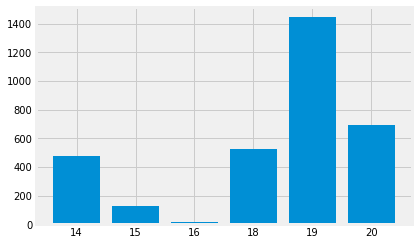

In [39]:
logtimes= tracker.count(axis='columns')
tmp = Counter(logtimes) 
tempsort= OrderedDict(sorted(tmp.items(), key=lambda t: t[0]))
names = list(tempsort.keys())
values = list(tempsort.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(tempsort)),values,tick_label=names)
plt.show()

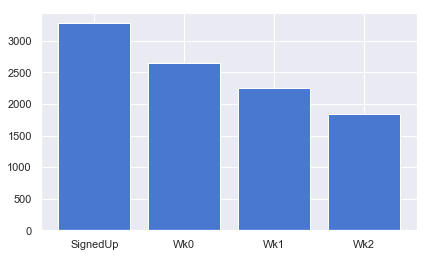

{'SignedUp': 3278, 'Wk0': 2652, 'Wk1': 2250, 'Wk2': 1840}


In [74]:
dropout = {'SignedUp': tracker.Start_Weight.count() , \
         'Wk0': tracker["Week 0"].count(), 'Wk1': tracker["Week 1"].count(), 'Wk2': tracker["Week 2"].count()}

names = list(dropout.keys())
values = list(dropout.values())
plt.bar(range(len(dropout)),values,tick_label=names)

plt.show()
print(dropout)

In [53]:
Dict3 = {'SignedUp': tracker.Start_Weight.count() , \
         'Wk0': tracker["Week 0"].count(), 'Wk1': tracker["Week 1"].count(), 'Wk2': tracker["Week 2"].count()}
print(Dict3)

{'SignedUp': 3282, 'Wk0': 2656, 'Wk1': 2245, 'Wk2': 746}


In [40]:
tracker.Start_Weight.count()


Timestamp                         3282
What is your reddit username?     3282
Team                              3282
Age                               3282
Gender                            3282
Height                            3282
High_Weight                       3282
Start_Weight                      3282
Newbies                           3282
Goal_Weight                       2660
Starting BMI                      3282
Current Weight                    3282
Current BMI                       3282
Challenge Loss                    3282
Challenge BMI Change              3282
Pounds to Goal                    2660
Week 0                            2656
Week 1                            2245
Week 2                             746
Week 3                               0
Week 4                               0
Week 5                               0
Week 6                               0
Week 7                               0
Goal_Loss                         2660
dtype: int64

[(18, 1467), (19, 691), (17, 535), (14, 476), (15, 127), (16, 19)]

In [6]:
logtimes= tracker.count(axis='columns')
logtimes 



NameError: name 'tracker' is not defined

In [ ]:
#print(len(dropout["Goal_Loss"]))
#dropout = tracker.Goal_Weight.dropna()
#dropout.head()